### Installing all Depidencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Loading

In [ ]:

data = pd.read_csv("/content/historic.csv")


### Step 2: Basic Data Exploration:

  - Display the first few rows of the dataset to get an - overview of the data structure.

  - Check the dimensions of the dataset (number of rows and columns).

  - Check for missing values and handle them appropriately (imputation or removal).

  - Check for duplicate rows and remove them if necessary.

  - Check the data types of each column and convert them if needed (e.g., converting categorical variables to the appropriate data type).


In [ ]:
# First few rows of the dataset
# Decide whether to group data into classes. Th
# print("First few rows of the dataset:")
# print(data.head())

print(data)

      item_no    category       main_promotion   color  stars  \
0      739157       Tunic              Catalog   Green    3.1   
1      591846      Hoodie   Category_Highlight     Red    1.5   
2      337574  Sweatshirt              Catalog     Red    4.4   
3      401933  Polo-Shirt   Category_Highlight    Blue    3.1   
4      812151      Hoodie   Category_Highlight   Green    4.1   
...       ...         ...                  ...     ...    ...   
7995   280947     T-Shirt              Catalog    Blue    3.9   
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5   
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0   
7998   786448      Blouse   Category_Highlight    Blue    2.6   
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9   

     success_indicator  
0                 flop  
1                 flop  
2                  top  
3                 flop  
4                  top  
...                ...  
7995              flop  
7996               

In [ ]:
# Dimensions of the dataset

print("\nDimensions of the dataset:")
print(data.shape)


Dimensions of the dataset:
(8000, 6)


In [ ]:
# Check for missing values
missing = data.isnull().sum()
print(missing)

if missing.any():
    print("\nThere are some missing values.")
else:
    print("\nThere are no missing values.")

# Decide whether to group data into classes. Th
# Remove rows if missing values were present
    # data = data.dropna()

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

There are no missing values.


In [ ]:
# Check for duplicate rows
print("\nDuplicate rows:", data.duplicated().sum())


# Remove duplicate rows if present
    # data = data.drop_duplicates()


Duplicate rows: 0


In [ ]:
# Check the data types of each column
# Decide whether to group data into classes. Th

print("Data types:\n")
print(data.dtypes)


Data types:

item_no                int64
category              object
main_promotion        object
color                 object
stars                float64
success_indicator     object
dtype: object


### Step 3: Univariate Analysis

 It is difficult to tell what is going on with each variable in this data set. Raw data is difficult to grasp, especially with large number of cases or records. Univariate descriptive statistics can summarize large quantities of numerical data and reveal patterns in the raw data. In order to present the information in a more organized format, start with univariate descriptive statistics for each variable.

In [ ]:
# As you see there are there are Numerical and Categorical values in th dataset
# Therefore performing univariate analysis for both types

# 1) Frequency Distribution
# We create a frequency distribution to count the occurrences of each value in a variable. This helps in understanding the distribution of values.

# 2) Grouped Data
# Decide whether to group data into classes. This can be done based on equal class intervals or equal frequencies in each group.

# 3) Cumulative Distributions
# Cumulative frequency distributions show the total frequency up to a certain value. This helps in understanding the cumulative distribution of values.

# 4) Percentage Distributions
# Percentage distributions express frequencies as percentages of the total. This provides insights into the proportion of each value relative to the total.




#### Univariate For Numerical Values

In [ ]:
# For Numerical variables
numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_vars)

Index(['item_no', 'stars'], dtype='object')


In [ ]:
# Frequency_distribution
# Calculate frequency distribution
frequency_distribution = data[numerical_vars].value_counts().sort_index()

# Display frequency distribution table
print("Frequency Distribution Table:")
print(frequency_distribution)

Frequency Distribution Table:
item_no  stars
100171   4.9      1
100305   4.8      1
100453   3.7      1
100538   2.7      1
100824   2.9      1
                 ..
989444   5.3      1
989461   1.7      1
989665   3.7      1
989679   3.4      1
989740   3.4      1
Length: 8000, dtype: int64


In [ ]:
# Your DataFrame
data = pd.DataFrame({
    'item_no': [739157, 591846, 337574, 401933, 812151],
    'category': ['Tunic', 'Hoodie', 'Sweatshirt', 'Polo-Shirt', 'Hoodie'],
    'main_promotion': ['Catalog', 'Category_Highlight', 'Catalog', 'Category_Highlight', 'Category_Highlight'],
    'color': ['Green', 'Red', 'Red', 'Blue', 'Green'],
    'stars': [3.1, 1.5, 4.4, 3.1, 4.1],
    'success_indicator': ['flop', 'flop', 'top', 'flop', 'top']
})

print(data.dtypes)


item_no                int64
category              object
main_promotion        object
color                 object
stars                float64
success_indicator     object
dtype: object


In [ ]:

# Separate numerical and categorical variables
numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = data.select_dtypes(include='object').columns


print(numerical_vars)
print(categorical_vars)


Index(['item_no', 'stars'], dtype='object')
Index(['category', 'main_promotion', 'color', 'success_indicator'], dtype='object')


In [ ]:
grouped_data = {}
for var in numerical_vars:
    grouped_data[var] = pd.cut(data[var], bins=3).value_counts().sort_index()

# Combine the grouped data into a single DataFrame
grouped_data_df = pd.concat(grouped_data, axis=1)

print("\nGrouped Data:")
print(grouped_data_df)
print("Total:", grouped_data_df.sum())



Grouped Data:
                          item_no  stars
(337099.423, 495766.333]      2.0    NaN
(495766.333, 653958.667]      1.0    NaN
(653958.667, 812151.0]        2.0    NaN
(1.497, 2.467]                NaN    1.0
(2.467, 3.433]                NaN    2.0
(3.433, 4.4]                  NaN    2.0
Total: item_no    5.0
stars      5.0
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Get all column names except 'item_no'
columns_to_plot = data.columns.difference(['item_no'])

# Set up the subplots
num_plots = len(columns_to_plot)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each column's distribution
for i, col in enumerate(columns_to_plot):
    distribution = data[col].value_counts().sort_index()
    ax = axes[i]
    ax.bar(distribution.index, distribution.values, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


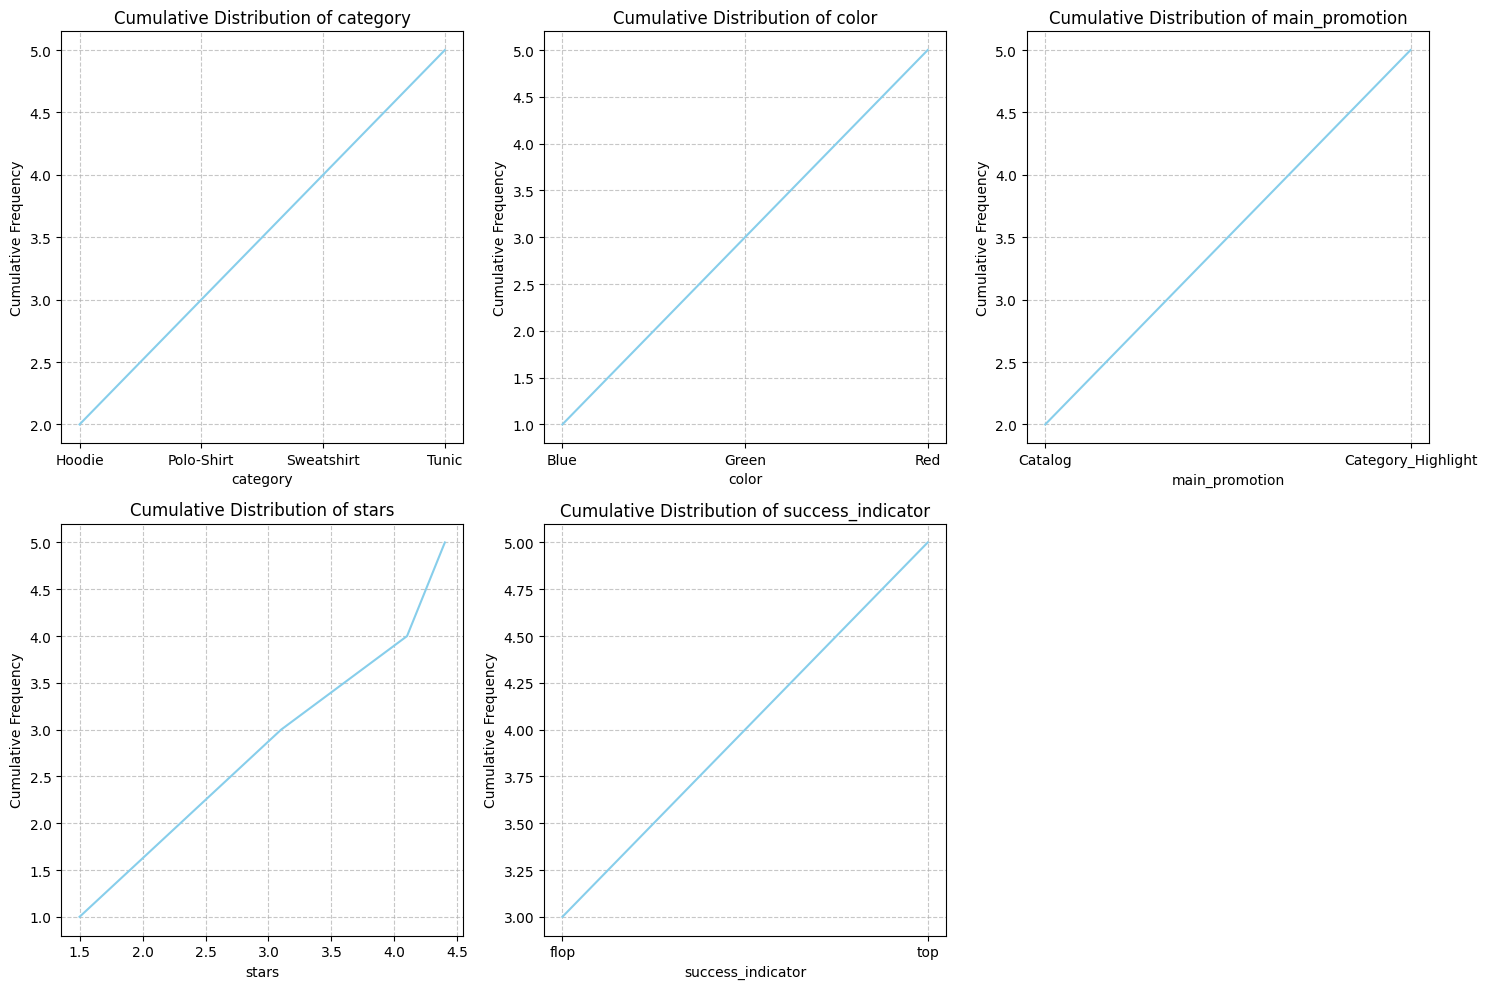

In [ ]:
import matplotlib.pyplot as plt

# Get all column names except 'item_no'
columns_to_plot = data.columns.difference(['item_no'])

# Set up the subplots
num_plots = len(columns_to_plot)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot cumulative distribution for each column
for i, col in enumerate(columns_to_plot):
    cumulative_distribution = data[col].value_counts().sort_index().cumsum()
    ax = axes[i]
    ax.plot(cumulative_distribution.index, cumulative_distribution.values, color='skyblue')
    ax.set_title(f'Cumulative Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cumulative Frequency')
    ax.grid(linestyle='--', alpha=0.7)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get all column names except 'item_no'
columns_to_plot = data.columns.difference(['item_no'])

# Set up the subplots
num_plots = len(columns_to_plot)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot percentage distribution for each column
for i, col in enumerate(columns_to_plot):
    percentage_distribution = data[col].value_counts(normalize=True).sort_index() * 100
    ax = axes[i]
    ax.bar(percentage_distribution.index, percentage_distribution.values, color='skyblue')
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Frequency distribution and percentage distribution are related but not the same:

  - Frequency Distribution: It shows how often each value occurs in a dataset. It counts the occurrences of each unique value.

  - Percentage Distribution: It shows the proportion of each value relative to the total number of observations in the dataset. It calculates the percentage of occurrences of each unique value.

### Step 4: Bivariate Analysis

Pairwise scatter plots are typically used for numerical variables because they visualize the relationship between two continuous variables by plotting one variable against the other. This allows us to observe patterns, correlations, and potential trends between numerical variables.

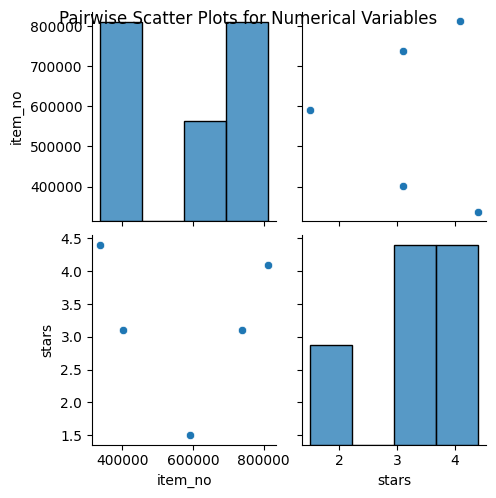

In [ ]:
# Step 4: Bivariate Analysis
# Pairwise scatter plots for numerical variables
import seaborn as sns

sns.pairplot(data[numerical_vars])
plt.suptitle("Pairwise Scatter Plots for Numerical Variables")
plt.show()


### Step 5: Multivariate Analysis

<ipython-input-20-0ae48fd394d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


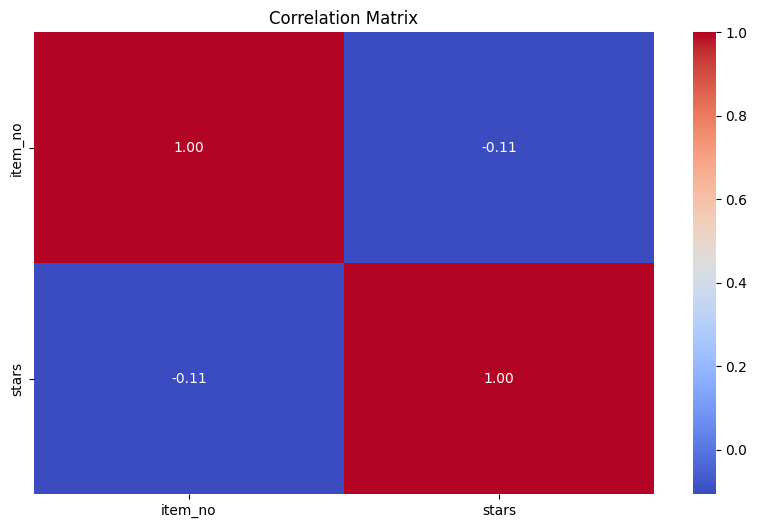

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###  Step 6: Feature Engineering


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 1. Analyze numerical variables
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
numerical_analysis = data[numerical_vars].describe()

# 2. Analyze categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns
categorical_analysis = data[categorical_vars].describe()

# 3. Perform one-hot encoding for categorical variables
# Apply one-hot encoding to categorical variables
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_vars)], remainder='passthrough')
encoded_data = transformer.fit_transform(data)

# Convert the transformed data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=transformer.get_feature_names_out(input_features=data.columns))

# 4. Scale numerical features if necessary
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_vars])
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_vars)

# Display the results
print("Numerical Analysis:")
print(numerical_analysis)
print("\nCategorical Analysis:")
print(categorical_analysis)
print("\nOne-Hot Encoded Data:")
print(encoded_df.head())
print("\nScaled Numerical Data:")
print(scaled_numerical_df.head())


Numerical Analysis:
             item_no     stars
count       5.000000  5.000000
mean   576532.200000  3.240000
std    206023.942144  1.134901
min    337574.000000  1.500000
25%    401933.000000  3.100000
50%    591846.000000  3.100000
75%    739157.000000  4.100000
max    812151.000000  4.400000

Categorical Analysis:
       category      main_promotion  color success_indicator
count         5                   5      5                 5
unique        4                   2      3                 2
top      Hoodie  Category_Highlight  Green              flop
freq          2                   3      2                 3

One-Hot Encoded Data:
   cat__category_Hoodie  cat__category_Polo-Shirt  cat__category_Sweatshirt  \
0                   0.0                       0.0                       0.0   
1                   1.0                       0.0                       0.0   
2                   0.0                       0.0                       1.0   
3                   0.0           

### Step 7: Summary and Insights